# 🔢 MLP (Multi-Layer Perceptron) on CIFAR-10

本 notebook 复刻 LeNet 的所有实验流程，但全部替换为 MLP（多层感知机）实现，适配 CIFAR-10 数据集。


## 环境与依赖

In [1]:
# 环境设置
import os
import sys

# 确保能导入项目模块
project_root = os.path.abspath("..")
sys.path.append(project_root)
print(f"项目根目录: {project_root}")

# 清除所有Python缓存文件，确保加载最新的模块版本
import shutil
for root, dirs, files in os.walk(project_root):
    if "__pycache__" in dirs:
        pycache_dir = os.path.join(root, "__pycache__")
        print(f"清理缓存目录: {pycache_dir}")
        try:
            shutil.rmtree(pycache_dir)
        except Exception as e:
            print(f"  清理错误: {e}")

# 导入必要的模块
from pathlib import Path
from utils.visualization import plot_training_metrics, plot_experiment_comparison
from utils.experiment import save_experiment_results, load_experiment_results

# 创建输出目录
outputs_dir = Path(os.path.join(project_root, 'outputs', 'mlp'))
outputs_dir.mkdir(parents=True, exist_ok=True)
print(f"输出目录: {outputs_dir}")

# 导入训练模块
from train.train_mlp import run_mlp_training, get_cifar10_loader


项目根目录: c:\Users\WHY\Projects\Personal\PyTorch_Learning
清理缓存目录: c:\Users\WHY\Projects\Personal\PyTorch_Learning\models\__pycache__
清理缓存目录: c:\Users\WHY\Projects\Personal\PyTorch_Learning\train\__pycache__
清理缓存目录: c:\Users\WHY\Projects\Personal\PyTorch_Learning\utils\__pycache__
输出目录: c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp


## 1️⃣  基础训练：MLP 在 CIFAR-10 上的表现

[MLP] Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

=== Epoch 1 ===
[12800/50000] loss: 1.8080
[25600/50000] loss: 1.6456
[38400/50000] loss: 1.5952
Val loss: 1.5067, Acc: 47.19%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\mlp_best.pth

=== Epoch 2 ===
[12800/50000] loss: 1.4625
[25600/50000] loss: 1.4529
[38400/50000] loss: 1.4369
Val loss: 1.4498, Acc: 49.53%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\mlp_best.pth

=== Epoch 3 ===
[12800/50000] loss: 1.3576
[25600/50000] loss: 1.3487
[38400/50000] loss: 1.3439
Val loss: 1.4042, Acc: 50.79%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\mlp_best.pth
[(1.506678102016449, 47.19), (1.449838581085205, 49.53), (1.4042016291618347, 50.79)]


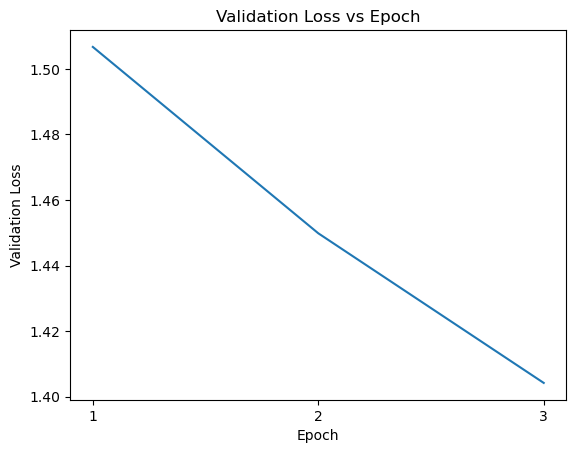

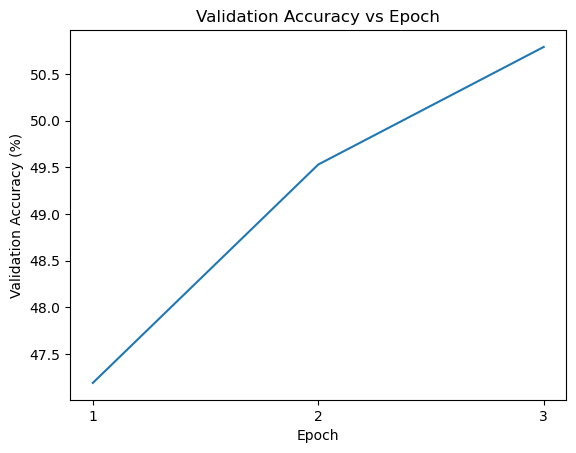

In [ ]:
# 运行训练，使用修正后的MLP模型（适配CIFAR-10的3通道图像）
# 确保我们使用的是最新的修正版本
import importlib
import models.mlp
importlib.reload(models.mlp)

metrics = run_mlp_training(epochs=3, log_interval=200)
print(metrics)

# 创建度量图保存目录
metrics_dir = outputs_dir / 'mlp_metrics'
metrics_dir.mkdir(parents=True, exist_ok=True)

# 绘制训练指标图并保存
plot_training_metrics(metrics, save_path=str(metrics_dir))


In [3]:
# 只测试第一组超参数，减少实验时间
param_grid = [
    {"lr": 0.1, "momentum": 0.9, "batch_size": 64, "weight_decay": 0, "patience": 3, "min_delta": 0.0},
    # 以下参数组合暂时注释掉，以加快测试速度
    # {"lr": 0.1, "momentum": 0.95, "batch_size": 64, "weight_decay": 1e-4, "patience": 3, "min_delta": 1e-3},
    # {"lr": 0.01, "momentum": 0.9, "batch_size": 128, "weight_decay": 1e-5, "patience": 5, "min_delta": 0.0},
    # {"lr": 0.01, "momentum": 0.95, "batch_size": 128, "weight_decay": 1e-4, "patience": 5, "min_delta": 1e-3},
    # {"lr": 0.001, "momentum": 0.9, "batch_size": 256, "weight_decay": 0, "patience": 7, "min_delta": 0.0},
]

all_results = []
for cfg in param_grid:
    # 为每种参数配置创建专门的输出目录
    cfg_output_dir = outputs_dir / f"lr{cfg['lr']}_mom{cfg['momentum']}_bs{cfg['batch_size']}_pat{cfg['patience']}"
    cfg_output_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"\n测试配置: {cfg}")
    metrics = run_mlp_training(
        epochs=3,  # 使用更小的epoch值以便快速测试
        train_batch_size=cfg["batch_size"],
        test_batch_size=1000,
        lr=cfg["lr"],
        momentum=cfg["momentum"],
        weight_decay=cfg["weight_decay"],
        patience=cfg["patience"],
        min_delta=cfg["min_delta"],
        log_interval=200,
        output_dir=str(cfg_output_dir)
    )
    all_results.append({"config": cfg, "metrics": metrics})

# 创建路径对象并确保目录存在
experiment_results_path = outputs_dir / "experiment_results.json"
# 保存实验结果
save_experiment_results(all_results, str(experiment_results_path))

# 如果有多个参数配置，则绘制比较图
if len(all_results) > 1:
    plot_experiment_comparison(all_results, metric="accuracy")



测试配置: {'lr': 0.1, 'momentum': 0.9, 'batch_size': 64, 'weight_decay': 0, 'patience': 3, 'min_delta': 0.0}
[MLP] Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

=== Epoch 1 ===
[12800/50000] loss: 1.8175
[25600/50000] loss: 1.6351
[38400/50000] loss: 1.5947
Val loss: 1.5111, Acc: 46.84%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\lr0.1_mom0.9_bs64_pat3\mlp_best.pth

=== Epoch 2 ===
[12800/50000] loss: 1.4510
[25600/50000] loss: 1.4518
[38400/50000] loss: 1.4346
Val loss: 1.4420, Acc: 49.33%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\lr0.1_mom0.9_bs64_pat3\mlp_best.pth

=== Epoch 3 ===
[12800/50000] loss: 1.3467
[25600/50000] loss: 1.3447
[38400/50000] loss: 1.3624
Val loss: 1.4122, Acc: 50.40%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\lr0.1_mom0.9_bs64_pat3\mlp_best.pth
实验结果已保存到: c:\Users\WHY\Projects\Person

## 2️⃣  超参数网格搜索 (Grid Search)

In [4]:
# 只测试第一组超参数，完整实验
param_grid = [
    {"lr": 0.1, "momentum": 0.9, "batch_size": 64, "weight_decay": 0, "patience": 3, "min_delta": 0.0},
    # 以下参数组合暂时注释掉，以加快测试速度
    # {"lr": 0.1, "momentum": 0.95, "batch_size": 64, "weight_decay": 1e-4, "patience": 3, "min_delta": 1e-3},
    # {"lr": 0.01, "momentum": 0.9, "batch_size": 128, "weight_decay": 1e-5, "patience": 5, "min_delta": 0.0},
    # {"lr": 0.01, "momentum": 0.95, "batch_size": 128, "weight_decay": 1e-4, "patience": 5, "min_delta": 1e-3},
    # {"lr": 0.001, "momentum": 0.9, "batch_size": 256, "weight_decay": 0, "patience": 7, "min_delta": 0.0},
]

all_results = []
for cfg in param_grid:
    # 为每种参数配置创建专门的输出目录
    cfg_output_dir = outputs_dir / f"lr{cfg['lr']}_mom{cfg['momentum']}_bs{cfg['batch_size']}_pat{cfg['patience']}"
    cfg_output_dir.mkdir(parents=True, exist_ok=True)
    
    print(f"\n测试配置: {cfg}")
    metrics = run_mlp_training(
        epochs=5, # 减少训练轮数以加快测试速度
        train_batch_size=cfg["batch_size"],
        test_batch_size=1000,
        lr=cfg["lr"],
        momentum=cfg["momentum"],
        weight_decay=cfg["weight_decay"],
        patience=cfg["patience"],
        min_delta=cfg["min_delta"],
        log_interval=200,
        output_dir=str(cfg_output_dir)
    )
    all_results.append({"config": cfg, "metrics": metrics})

# 保存实验结果
experiments_file_path = outputs_dir / "mlp_experiments.json"
save_experiment_results(all_results, str(experiments_file_path))

# 如果有多个参数配置，则绘制比较图
if len(all_results) > 1:
    from utils.visualization import plot_experiment_comparison
    plot_experiment_comparison(all_results, metric="accuracy")



测试配置: {'lr': 0.1, 'momentum': 0.9, 'batch_size': 64, 'weight_decay': 0, 'patience': 3, 'min_delta': 0.0}
[MLP] Using device: cpu
Files already downloaded and verified
Files already downloaded and verified

=== Epoch 1 ===
[12800/50000] loss: 1.8198
[25600/50000] loss: 1.6570
[38400/50000] loss: 1.5726
Val loss: 1.5046, Acc: 47.55%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\lr0.1_mom0.9_bs64_pat3\mlp_best.pth

=== Epoch 2 ===
[12800/50000] loss: 1.4542
[25600/50000] loss: 1.4643
[38400/50000] loss: 1.4275
Val loss: 1.4448, Acc: 49.98%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\lr0.1_mom0.9_bs64_pat3\mlp_best.pth

=== Epoch 3 ===
[12800/50000] loss: 1.3463
[25600/50000] loss: 1.3509
[38400/50000] loss: 1.3395
Val loss: 1.4186, Acc: 50.92%
  → loss improved, saved to c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\lr0.1_mom0.9_bs64_pat3\mlp_best.pth

=== Epoch 4 ===
[12800/50000] loss: 1

## 3️⃣  超参数与准确率关系可视化 (平行坐标图)

使用实验结果文件: c:\Users\WHY\Projects\Personal\PyTorch_Learning\outputs\mlp\experiment_results.json


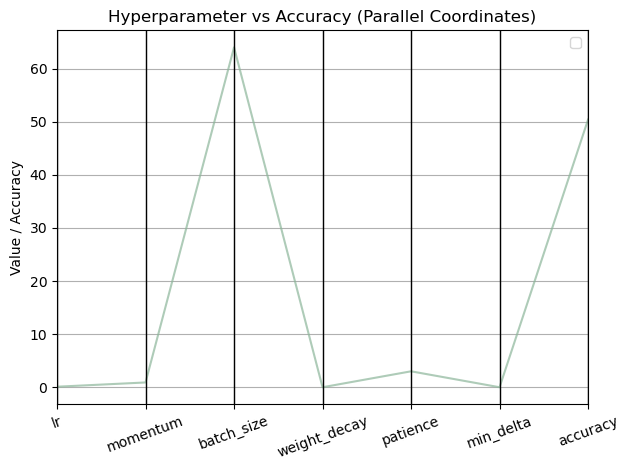

In [5]:
from utils.visualization import plot_hyperparam_parallel
import os

# 检查实验结果文件是否存在
experiment_results_path = outputs_dir / "experiment_results.json"
mlp_experiments_path = outputs_dir / "mlp_experiments.json"

# 检查两个可能的实验结果文件
if os.path.exists(str(experiment_results_path)):
    print(f"使用实验结果文件: {experiment_results_path}")
    results = load_experiment_results(str(experiment_results_path))
    plot_hyperparam_parallel(results)
elif os.path.exists(str(mlp_experiments_path)):
    print(f"使用实验结果文件: {mlp_experiments_path}")
    results = load_experiment_results(str(mlp_experiments_path))
    plot_hyperparam_parallel(results)
else:
    print("找不到实验结果文件。请先运行网格搜索单元格生成实验结果文件。")
    print(f"尝试寻找的文件路径:")
    print(f" - {experiment_results_path}")
    print(f" - {mlp_experiments_path}")


## 4️⃣  后续探索建议
- 尝试更深/更宽的 MLP 结构
- 尝试不同激活函数、优化器
- 对比不同正则化策略
- 迁移到其他数据集（如 Fashion-MNIST）
